  Question: In hindsight, do you think Britain was right or wrong to vote to leave the EU?  \
0                     Source: NatCen Social Research                                         
1                                                NaN                                         
2                                               Date                                         
3                                           02/08/16                                         
4                                           09/08/16                                         

           Unnamed: 1          Unnamed: 2  
0                 NaN                 NaN  
1                 NaN                 NaN  
2  % responding right  % responding wrong  
3                  46                  42  
4                  45                  44  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column                                                          

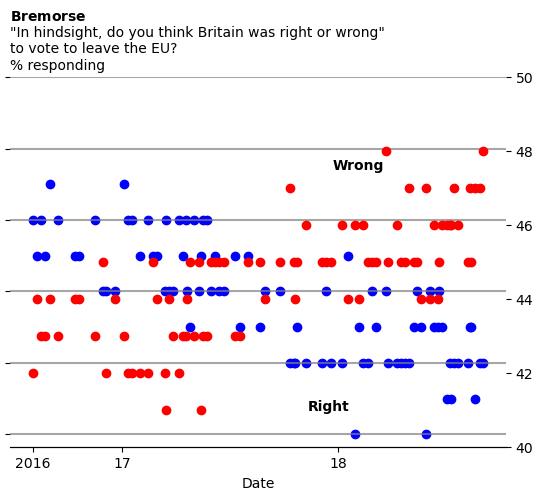

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import linregress

# Import the data from a csv file save it as a DataFrame called "brexit.csv"
brexit_df = pd.read_csv("brexit.csv")
print(brexit_df.head())

print(brexit_df.info())
print(brexit_df.columns)
print(brexit_df.iloc[:, 1])
print(brexit_df.iloc[:, 2])
print(brexit_df['Question: In hindsight, do you think Britain was right or wrong to vote to leave the EU?'])

brexit_df = brexit_df.rename(columns={'Unnamed: 1': 'Right',
                                      'Unnamed: 2': 'Wrong',
                                      'Question: In hindsight, do you think Britain was right or wrong to vote to leave the EU?': 'Date'})
print(brexit_df.columns)
print(brexit_df.head())

brexit_df = brexit_df.iloc[3:]
print(brexit_df.head())

# Check if 'Date' is datetime format
if not pd.api.types.is_datetime64_dtype(brexit_df['Date']):
  # Convert 'Date' column to datetime format (assuming format is '%d/%m/%y')
  brexit_df['Date'] = pd.to_datetime(brexit_df['Date'], format='%d/%m/%y')

# Drop rows with NaN values
brexit_df.dropna(inplace=True)

# Convert 'Right' and 'Wrong' columns to numeric types
brexit_df['Right'] = pd.to_numeric(brexit_df['Right'])
brexit_df['Wrong'] = pd.to_numeric(brexit_df['Wrong'])

# Plot the scatter plot
fig, ax1 = plt.subplots()
ax1.scatter(brexit_df['Date'], brexit_df['Right'], color='b')
ax1.set_xticks(['2016-08-02', '2017', '2018'])
ax1.set_xticklabels(['2016', '17', '18'])
ax1.set_yticks([40, 42, 44, 46, 48, 50])
ax1.set_xlabel('Date')
ax1.tick_params(axis='y', labelleft=None)
# Add annotation for 'Right'
ax1.text(0.6, 0.1, 'Right', transform=ax1.transAxes, fontsize=10, weight='bold')

# Create a twin axis for 'Wrong'
ax2 = ax1.twinx()
ax2.scatter(brexit_df['Date'], brexit_df['Wrong'], color='r')
ax2.set_xticks(['2016-08-02', '2017', '2018'])
ax2.set_xticklabels(['2016', '17', '18'])
ax2.set_yticks([40, 42, 44, 46, 48, 50])
ax2.set_yticklabels([40, 42, 44, 46, 48, 50])
ax2.tick_params(axis='y')
# Add annotation for 'Wrong'
ax2.text(0.65, 0.75, 'Wrong', transform=ax2.transAxes, fontsize=10, weight='bold')

# Draw horizontal grid lines for y-ticks on ax1
yticks = ax1.get_yticks()
for y in yticks:
  ax1.axhline(y, color='gray', alpha=0.7)  # Adjust line style and opacity

# Remove top, right, and left spines (borders)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
plt.title('$\mathbf{Bremorse}$\n"In hindsight, do you think Britain was right or wrong"\nto vote to leave the EU?\n% responding', loc='left', fontsize=10)
plt.show()
